In [1]:
# Import Data
import numpy as np
import pandas as pd
df= pd.read_csv("C:/Users/chunweil/undersample_DCwater.csv")
df.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Unnamed: 0.1.1', u'GLOBALID', u'Year',
       u'BinomBreak', u'TMIN', u'SnowFall', u'Prcp', u'FrzIndex', u'DIAMTR',
       u'AGE15', u'FrostAct', u'CorCon', u'CorSteel', u'ClayPrct', u'HouseTot',
       u'Pop', u'Road', u'MATRL_CI', u'MATRL_Concrete', u'MATRL_DI',
       u'MATRL_Oth', u'MATRL_PVC', u'MATRL_Steel', u'MATRL_Unk', u'LANDUSE_0',
       u'LANDUSE_Commercial/Institutio0l', u'LANDUSE_Public',
       u'LANDUSE_Residential', u'LANDUSE_Transport', u'LANDUSE_Water',
       u'SoilType_0', u'SoilType_coarse-loamy', u'SoilType_fine',
       u'SoilType_fine-loamy', u'SoilType_fine-silty',
       u'SoilType_loamy-skeletal', u'SoilType_sandy',
       u'SoilType_sandy-skeletal', u'SoilType_unused', u'BusTraffic_0',
       u'BusTraffic_BusRestrict', u'BusTraffic_BusTruckRestrict',
       u'BusTraffic_PrimaryRoad', u'BusTraffic_TruckRestrict'],
      dtype='object')

In [2]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Year,BinomBreak,TMIN,SnowFall,Prcp,FrzIndex,DIAMTR,...,SoilType_fine-silty,SoilType_loamy-skeletal,SoilType_sandy,SoilType_sandy-skeletal,SoilType_unused,BusTraffic_0,BusTraffic_BusRestrict,BusTraffic_BusTruckRestrict,BusTraffic_PrimaryRoad,BusTraffic_TruckRestrict
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,151616.051980,151616.051980,151617.051980,28.952145,0.500000,9.313531,17.204703,39.811823,67.317657,25.694307,...,0.134488,0.012376,0.009076,0.009076,0.008251,0.573432,0.000825,0.028878,0.288779,0.108086
std,90428.260064,90428.260064,90428.260064,16.961491,0.500206,5.870672,13.168085,7.009618,13.559019,10.900874,...,0.341317,0.110604,0.094873,0.094873,0.090496,0.494782,0.028724,0.167532,0.453382,0.310617
min,202.000000,202.000000,203.000000,1.000000,0.000000,-5.000000,0.100000,26.940000,30.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72716.250000,72716.250000,72717.250000,14.000000,0.000000,6.000000,7.500000,34.980000,58.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,137148.000000,137148.000000,137149.000000,26.000000,0.500000,10.000000,12.800000,38.070000,69.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,246472.750000,246472.750000,246473.750000,47.000000,1.000000,14.000000,24.300000,46.020000,77.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,298495.000000,298495.000000,298496.000000,56.000000,1.000000,20.000000,56.100000,60.830000,91.000000,78.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Specify predictors and target  
# Predictors
a=range(5,46)
df_pred=df.iloc[:,a]
df_pred=df_pred.drop("BinomBreak",axis=1)
# Target
df_target=df.loc[:,"BinomBreak"]


In [6]:
# Feature Selection approach 1 : PCA
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# covert it into numpy arrays
X_ar=df_pred.values
# Scaling the values(n_components is the number of component you want to get, basically it would not exceed the # of variables)
X_ar=scale(X_ar)
pca=PCA(n_components=40)
pca.fit(X_ar)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print var1

[  12.61   20.38   26.25   31.07   35.7    39.77   43.79   47.45   50.93
   54.28   57.5    60.53   63.42   66.26   69.     71.69   74.32   76.92
   79.48   82.     84.39   86.66   88.83   90.95   92.88   94.43   95.93
   97.34   98.1    98.82   99.31   99.79   99.92  100.04  100.04  100.04
  100.04  100.04  100.04  100.04]


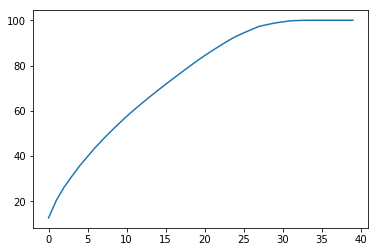

In [8]:
# x-axis is the number of component, y-axis is the explained variance by components
plt.plot(var1)

In [9]:
# Based on the figure, we select 27 as model component since the variance doesn't change too much after number 27
# change the number of components based on the results of PCA 
pca = PCA(n_components=27)
pca.fit(X_ar)
# transform 
pca_tra=pca.fit_transform(X_ar)
df_pca=pd.DataFrame(pca_tra)



In [10]:
# Columns represent component while rows contains the values corresponding to components 
df_pca

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.416745,-0.177771,-1.017309,2.184962,1.860481,0.609889,0.165680,-0.708022,1.056403,-1.036232,...,0.367671,0.326004,0.953697,-0.672473,-0.320170,-0.303263,0.188631,-1.105768,0.286581,-0.591637
1,2.158676,-0.475835,-1.711773,0.264547,1.017418,0.446781,-0.338702,-0.121801,0.771071,-1.759825,...,-0.022810,0.667075,1.041860,-0.276224,-0.199606,-0.566257,-1.098687,0.646550,-0.308912,-0.251962
2,2.822014,-0.005080,2.391427,-0.298651,-2.424395,-1.222058,-0.174307,-0.241617,2.033961,-0.852544,...,-0.435412,-0.552134,0.167639,0.308752,0.516602,-0.611572,0.585062,0.185727,0.117912,-1.616684
3,1.627544,-1.699631,-0.426485,-0.511475,-0.264309,-0.271538,1.698931,1.801196,-2.274444,0.663026,...,-0.079524,0.136838,-0.237187,-0.572809,0.273575,0.359869,-1.043950,0.720682,-0.214845,-0.888850
4,1.300680,-2.221362,3.413611,4.945441,0.804757,2.398608,1.241290,0.592718,2.198922,-0.181327,...,1.242992,-0.036478,-2.393479,0.959157,-0.568270,0.284524,-0.738132,0.336196,-1.198076,0.605263
5,2.826877,0.966938,0.198510,-0.253874,-3.534854,-1.299150,0.573135,-1.445945,1.050896,-0.367430,...,-0.529523,-0.267945,-0.251405,0.383230,0.379287,0.433606,-0.021849,1.125648,-0.185262,-1.397987
6,-2.570907,1.482384,-0.788930,-0.133386,-1.123564,-0.500740,0.633425,0.043679,-0.829470,0.699107,...,0.337339,0.121863,0.343167,0.498753,-1.042832,0.516812,-1.585597,-1.308753,0.551624,-1.897537
7,1.715442,-1.731904,-0.149080,0.085183,-0.106600,-0.051470,2.026042,1.626881,-2.359561,0.629676,...,-0.039498,0.219960,-0.677162,-0.779458,-0.116056,0.542037,-0.706557,0.800068,0.486296,0.349328
8,1.625388,0.648733,0.162283,-0.125348,-2.069418,-1.224057,1.382235,-1.194375,-1.689953,-1.623420,...,-0.090647,0.139586,-0.632286,0.913738,0.818658,1.107240,0.262103,0.819340,0.462337,0.248883
9,1.577833,-1.151876,-1.310703,0.271260,-0.341366,0.320193,1.014800,-0.362650,-1.690166,0.116869,...,0.007571,0.055036,-0.126139,0.702417,0.067444,0.541265,-0.152916,0.952120,0.301696,0.530318


In [12]:
# Feature Selection approach 2: Recursive feature elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
 
# use linear regression as the model
lr = LogisticRegression()
names=df_pred.columns
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(df_pred,df_target)
 
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))


Features sorted by their rank:
[(1.0, 'MATRL_DI'), (2.0, 'SoilType_sandy'), (3.0, 'LANDUSE_Public'), (4.0, 'SoilType_sandy-skeletal'), (5.0, 'MATRL_CI'), (6.0, 'MATRL_Steel'), (7.0, 'MATRL_Unk'), (8.0, 'SoilType_fine'), (9.0, 'LANDUSE_Residential'), (10.0, 'MATRL_PVC'), (11.0, 'BusTraffic_BusRestrict'), (12.0, 'MATRL_Oth'), (13.0, 'MATRL_Concrete'), (14.0, 'Road'), (15.0, 'BusTraffic_BusTruckRestrict'), (16.0, 'LANDUSE_Transport'), (17.0, 'SoilType_0'), (18.0, 'CorCon'), (19.0, 'SoilType_fine-silty'), (20.0, 'FrostAct'), (21.0, 'BusTraffic_PrimaryRoad'), (22.0, 'BusTraffic_TruckRestrict'), (23.0, 'SoilType_fine-loamy'), (24.0, 'SoilType_unused'), (25.0, 'SoilType_coarse-loamy'), (26.0, 'CorSteel'), (27.0, 'ClayPrct'), (28.0, 'DIAMTR'), (29.0, 'Prcp'), (30.0, 'TMIN'), (31.0, 'LANDUSE_Commercial/Institutio0l'), (32.0, 'FrzIndex'), (33.0, 'SnowFall'), (34.0, 'BusTraffic_0'), (35.0, 'SoilType_loamy-skeletal'), (36.0, 'AGE15'), (37.0, 'HouseTot'), (38.0, 'Pop'), (39.0, 'LANDUSE_Water'), (40

In [14]:
import numpy as np
select_RFE=sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))
RFE_select=pd.DataFrame(select_RFE)
old_names=[0,1]
new_names=["Rank","Features"]
RFE_select.rename(columns=dict(zip(old_names, new_names)), inplace=True)
RFE_select.head(10)



,Rank,Features
0,1.0,MATRL_DI
1,2.0,SoilType_sandy
2,3.0,LANDUSE_Public
3,4.0,SoilType_sandy-skeletal
4,5.0,MATRL_CI
5,6.0,MATRL_Steel
6,7.0,MATRL_Unk
7,8.0,SoilType_fine
8,9.0,LANDUSE_Residential
9,10.0,MATRL_PVC


In [15]:
# Feature Selection approach 3: Random Forest
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
np.random.seed(1)
rf = RandomForestRegressor()
rf.fit(df_pred,df_target)
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)


Features sorted by their score:
[(0.2165, 'AGE15'), (0.1063, 'SnowFall'), (0.0927, 'Prcp'), (0.081, 'DIAMTR'), (0.0703, 'Pop'), (0.0637, 'TMIN'), (0.0585, 'HouseTot'), (0.0536, 'FrzIndex'), (0.0472, 'Road'), (0.036, 'ClayPrct'), (0.0168, 'MATRL_CI'), (0.0152, 'SoilType_coarse-loamy'), (0.0127, 'BusTraffic_TruckRestrict'), (0.0122, 'BusTraffic_BusTruckRestrict'), (0.0119, 'CorSteel'), (0.0104, 'MATRL_Concrete'), (0.0103, 'FrostAct'), (0.0099, 'BusTraffic_0'), (0.0095, 'LANDUSE_Public'), (0.0095, 'BusTraffic_PrimaryRoad'), (0.0091, 'MATRL_Steel'), (0.0084, 'LANDUSE_Transport'), (0.0081, 'SoilType_fine-loamy'), (0.0073, 'SoilType_fine'), (0.0072, 'CorCon'), (0.0032, 'SoilType_sandy-skeletal'), (0.0028, 'SoilType_fine-silty'), (0.0026, 'SoilType_0'), (0.0017, 'LANDUSE_Residential'), (0.0016, 'MATRL_DI'), (0.0012, 'SoilType_unused'), (0.0008, 'SoilType_loamy-skeletal'), (0.0006, 'SoilType_sandy'), (0.0006, 'LANDUSE_Commercial/Institutio0l'), (0.0004, 'MATRL_Unk'), (0.0, 'MATRL_PVC'), (0.0, 

In [16]:
import numpy as np
select_RF=sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)
RF_select=pd.DataFrame(select_RF)
RF_select.head(20)


,0,1
0,0.2165,AGE15
1,0.1063,SnowFall
2,0.0927,Prcp
3,0.0810,DIAMTR
4,0.0703,Pop
5,0.0637,TMIN
6,0.0585,HouseTot
7,0.0536,FrzIndex
8,0.0472,Road
9,0.0360,ClayPrct


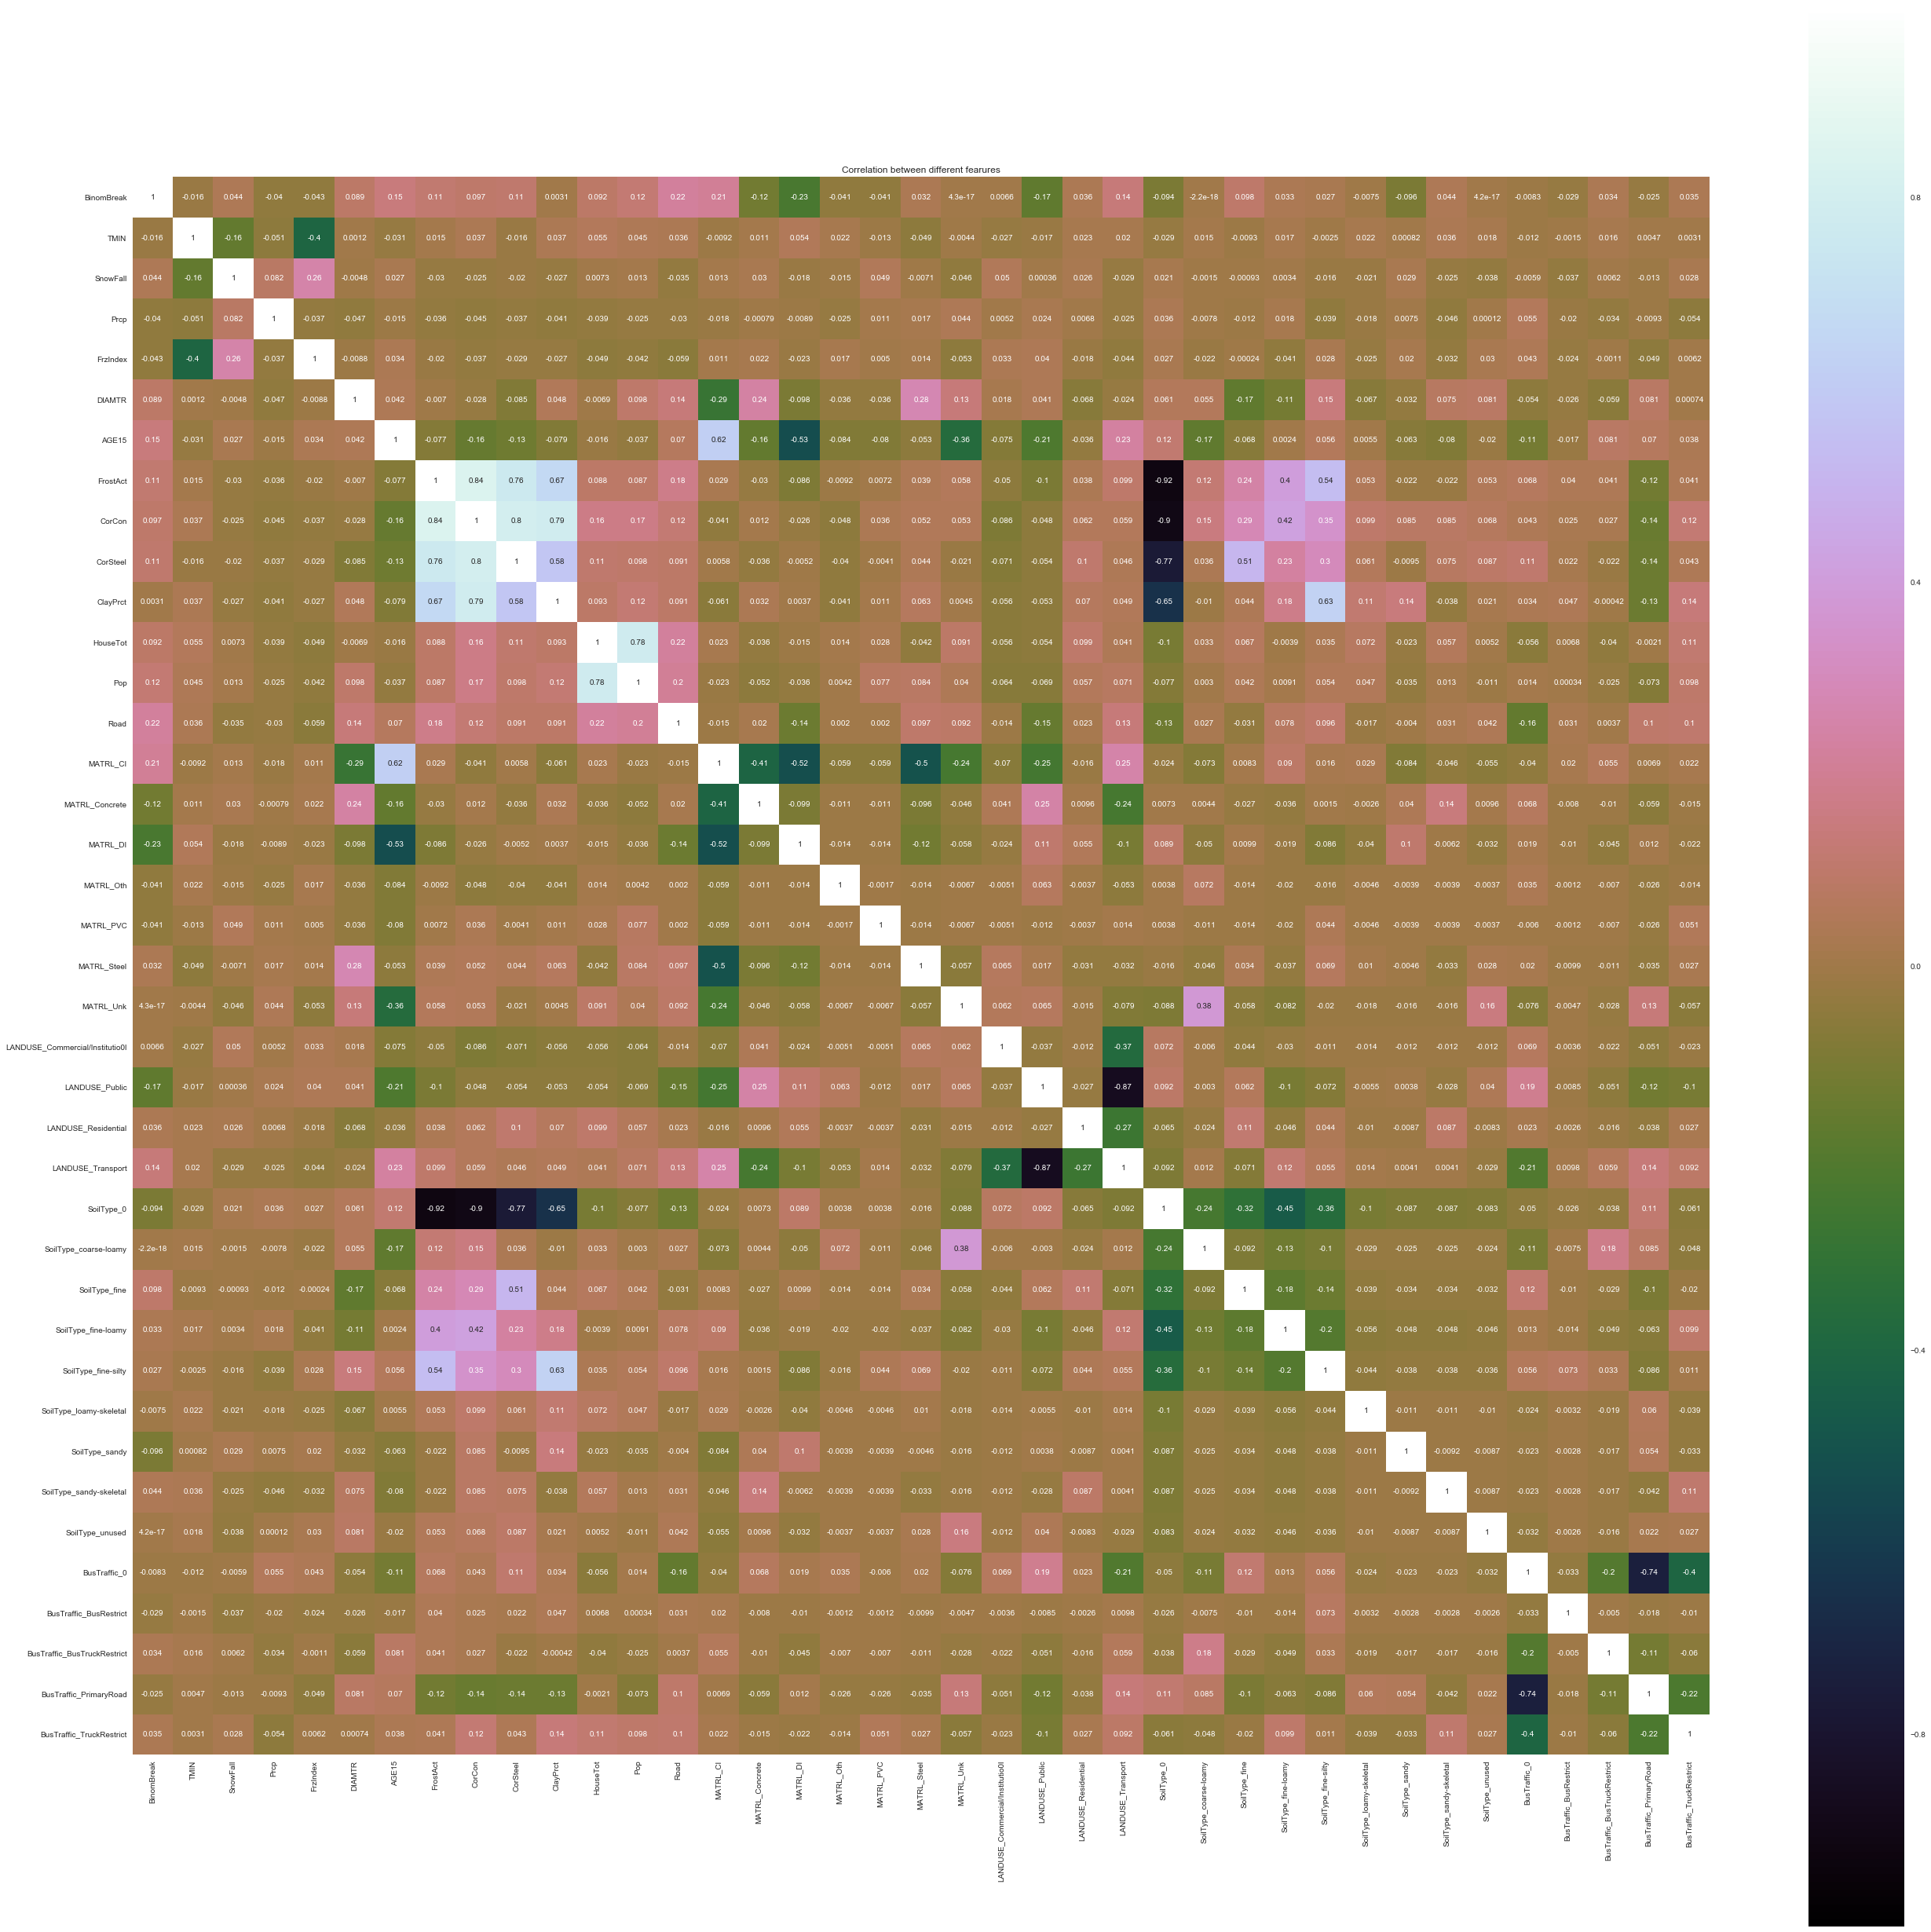

In [18]:
# Feature Selection approach 4: Correlation Matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# change the variables of your interest
df_correlation=df.drop(["LANDUSE_0","LANDUSE_Water",'Unnamed: 0', 'Unnamed: 0.1', "Unnamed: 0.1.1",'GLOBALID', 'Year'],1)
correlation=df_correlation.corr()
plo= plt.figure(figsize=(45,45))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different fearures')
plo.savefig('Correlation Matrix')

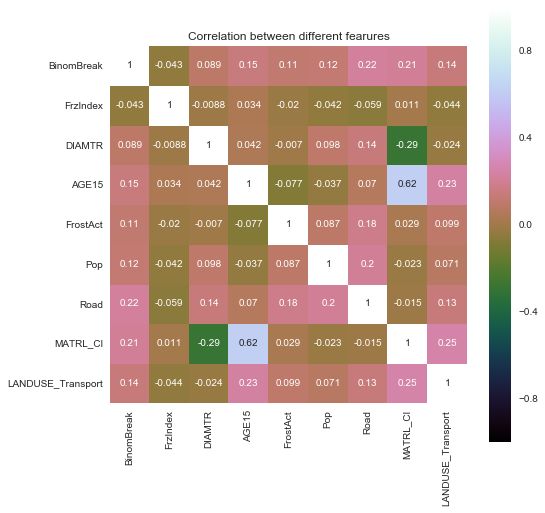

In [20]:
# Based from the result, we should drop variables that are highly correlaed with features that's already present
Important_feature=['BinomBreak','FrzIndex','DIAMTR','AGE15','FrostAct','Pop','Road','MATRL_CI','LANDUSE_Transport']
df_final=df.reindex(columns=Important_feature)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_final.corr()
correlation_f=df_final.corr()
plo_2= plt.figure(figsize=(8,8))
sns.heatmap(correlation_f, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different fearures')
plo_2.savefig('Correlation Matrix')

In [21]:
# check correlation between target and predictors 
correlation_break = pd.DataFrame(correlation_f["BinomBreak"])
correlation_break.sort_values(by = 'BinomBreak', ascending = False)

,BinomBreak
BinomBreak,1.000000
Road,0.222846
MATRL_CI,0.207063
AGE15,0.146800
LANDUSE_Transport,0.135167
Pop,0.120061
FrostAct,0.112432
DIAMTR,0.088858
FrzIndex,-0.042796
